# Ideeen uitwerken met echte data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np 

/home/emma/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Idee 1: soorten treinen vergelijken doorheen de jaren met hun vertraging

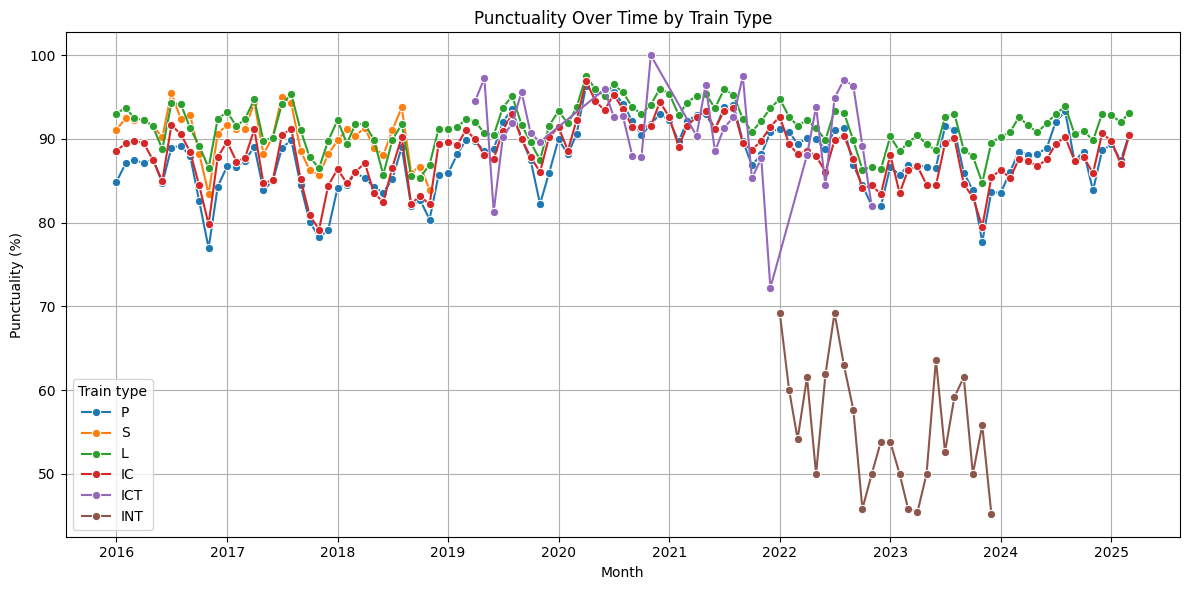

In [2]:
# Load the CSV file
df = pd.read_csv("../data_punctualite_typedetrain.csv", sep=";")

# Convert Month to datetime format
df['Month'] = pd.to_datetime(df['Month'])

# Sort by date to ensure the line chart is chronological
df = df.sort_values('Month')

# Plot punctuality over time per train type
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month', y='Punctuality', hue='Train type', marker='o')

plt.title("Punctuality Over Time by Train Type")
plt.xlabel("Month")
plt.ylabel("Punctuality (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

Hier kan je zien dat de ICT, INT en S treinen niet lang bestaan hebben, maar treinen zoals de P, IC en L treinen hebben altijd al gereden.

Ook duidelijk te zien dat de INT (internationale) altijd zeer slecht gescoord heeft voor stiptheid.

## Idee 2: per tijdseenheid verband aantal vertraagde treinen-aantal minuten tragen

In [3]:
print(df.columns.tolist())

['Month', 'Train type', 'Punctuality', 'Number of operated trains', 'Number of trains with a delay inferior to 6 minutes', 'Minutes of delay']


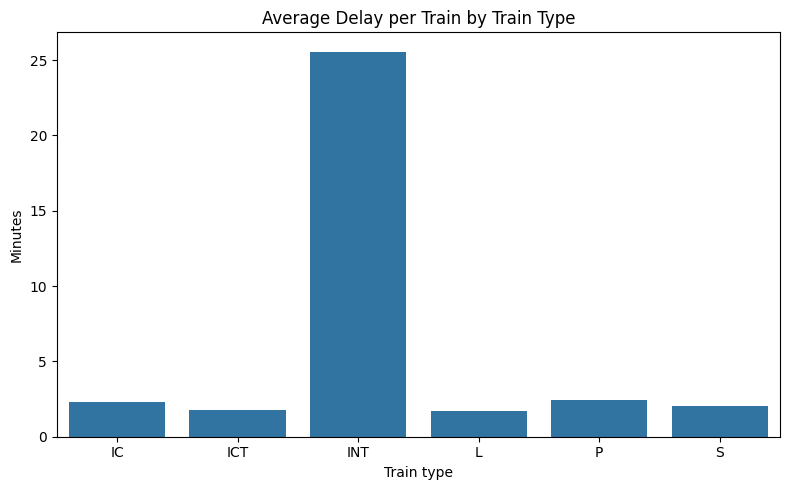

In [4]:
# Group by Train type and calculate average over the total number of trains
agg_df = df.groupby('Train type').apply(lambda x: x['Minutes of delay'].sum() / x['Number of operated trains'].sum()).reset_index(name='Avg delay per train')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=agg_df, x='Train type', y='Avg delay per train')

plt.title('Average Delay per Train by Train Type')
plt.ylabel('Minutes')
plt.tight_layout()
plt.show()

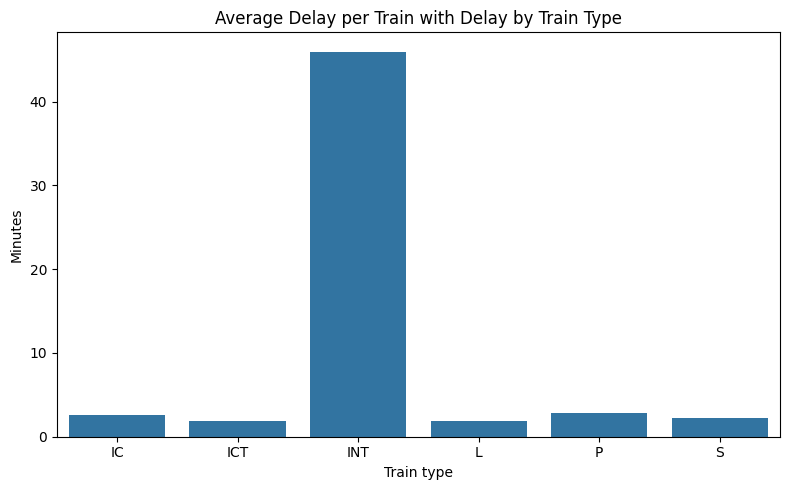

In [5]:
# Group by Train type and calculate average over the number of delayed trains here
agg_df = df.groupby('Train type').apply(lambda x: x['Minutes of delay'].sum() / x['Number of trains with a delay inferior to 6 minutes'].sum()).reset_index(name='Avg delay per train')

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=agg_df, x='Train type', y='Avg delay per train')

plt.title('Average Delay per Train with Delay by Train Type')
plt.ylabel('Minutes')
plt.tight_layout()
plt.show()

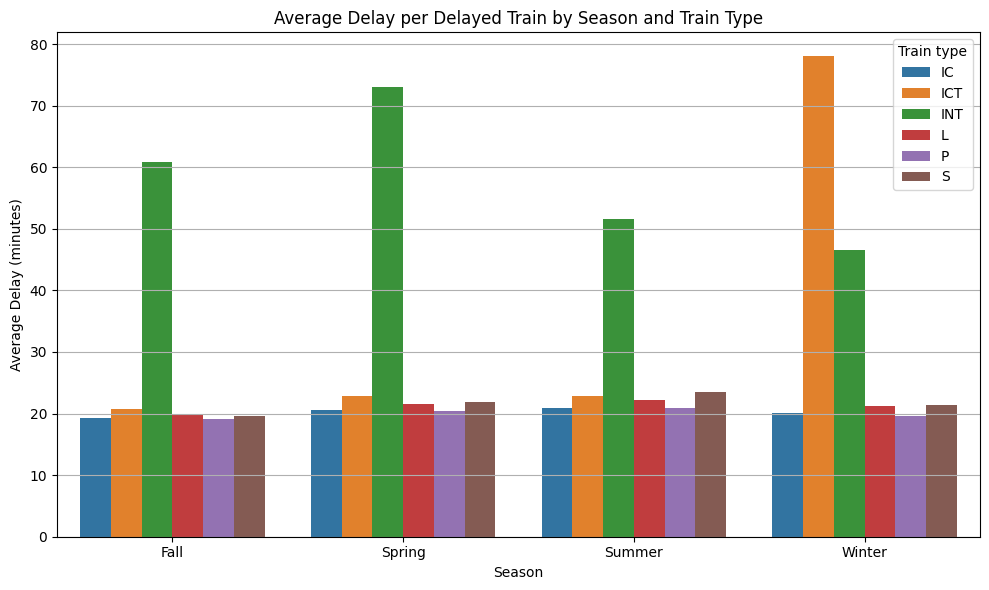

In [6]:
# Step 1: Add a season column
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].dt.month.map(get_season)

# Step 2: Calculate number of delayed trains
df['Delayed trains'] = df['Number of operated trains'] - df['Number of trains with a delay inferior to 6 minutes']

# Avoid divide by zero
df['Avg delay per delayed train'] = df['Minutes of delay'] / df['Delayed trains']
df['Avg delay per delayed train'] = df['Avg delay per delayed train'].replace([float('inf'), -float('inf')], pd.NA)

# Step 3: Group by Train type and Season
seasonal_avg = df.groupby(['Train type', 'Season'])['Avg delay per delayed train'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_avg, x='Season', y='Avg delay per delayed train', hue='Train type')

plt.title('Average Delay per Delayed Train by Season and Train Type')
plt.ylabel('Average Delay (minutes)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## Idee 3: evolutie stiptheid per seizoen

In [7]:
# Ensure data is sorted by date
df = df.sort_values('Month')

# Cumulative delay per train type
df['Cumulative delay'] = df.groupby('Train type')['Minutes of delay'].cumsum()

# Cumulative delay overall
df['Total cumulative delay'] = df['Minutes of delay'].cumsum()

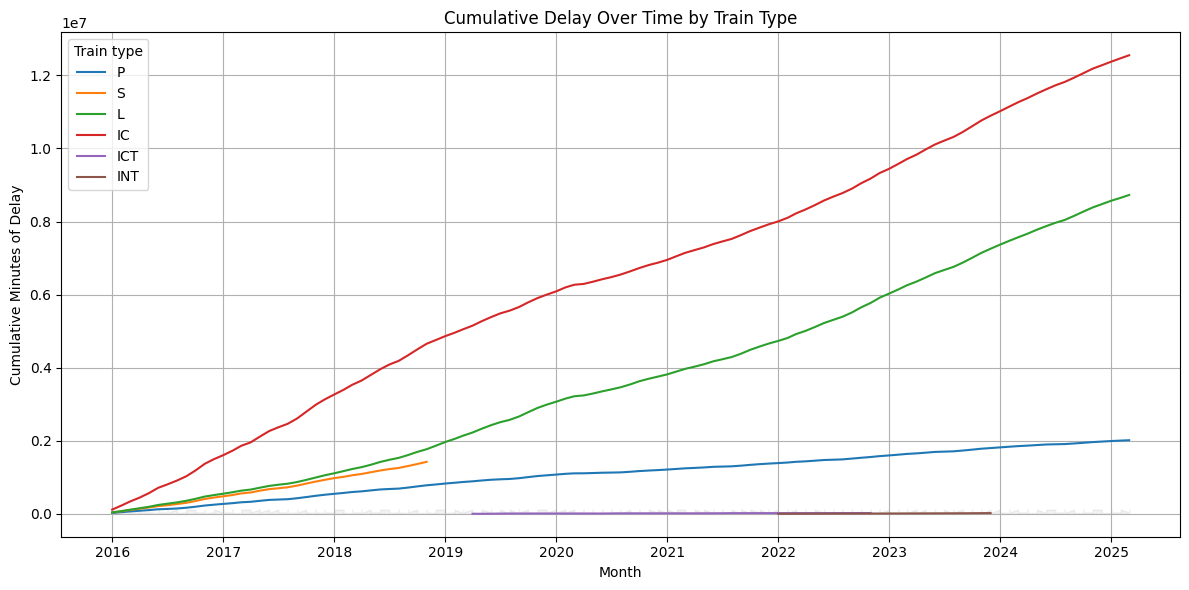

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Month', y='Cumulative delay', hue='Train type')
plt.fill_between(df['Month'], 0, df.groupby('Train type')['Cumulative delay'].transform('first'),
                 color='gray', alpha=0.1, label=None)  # Optional: helps mark starting point

plt.title('Cumulative Delay Over Time by Train Type')
plt.ylabel('Cumulative Minutes of Delay')
plt.grid(True)
plt.tight_layout()
plt.show()

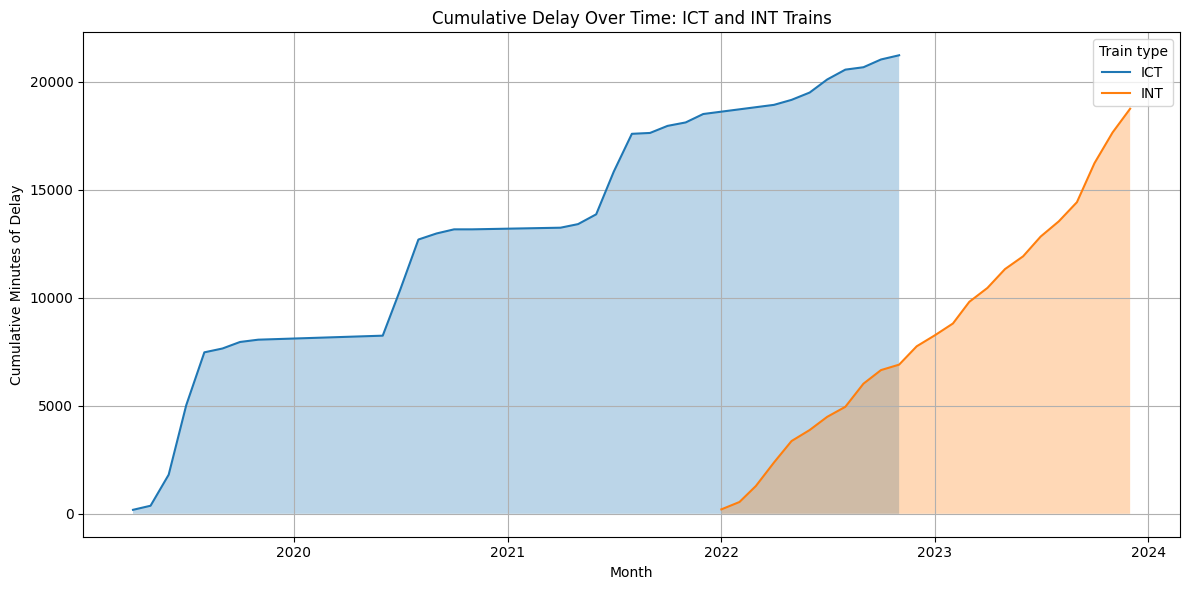

In [9]:
# Filter to ICT and INT
df_filtered = df[df['Train type'].isin(['ICT', 'INT'])].copy()

# Sort by date
df_filtered = df_filtered.sort_values('Month')

# Calculate cumulative delay per train type
df_filtered['Cumulative delay'] = df_filtered.groupby('Train type')['Minutes of delay'].cumsum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x='Month', y='Cumulative delay', hue='Train type')

# Optional: fill under each line
for train_type in ['ICT', 'INT']:
    temp = df_filtered[df_filtered['Train type'] == train_type]
    plt.fill_between(temp['Month'], temp['Cumulative delay'], alpha=0.3)

plt.title('Cumulative Delay Over Time: ICT and INT Trains')
plt.ylabel('Cumulative Minutes of Delay')
plt.grid(True)
plt.tight_layout()
plt.show()

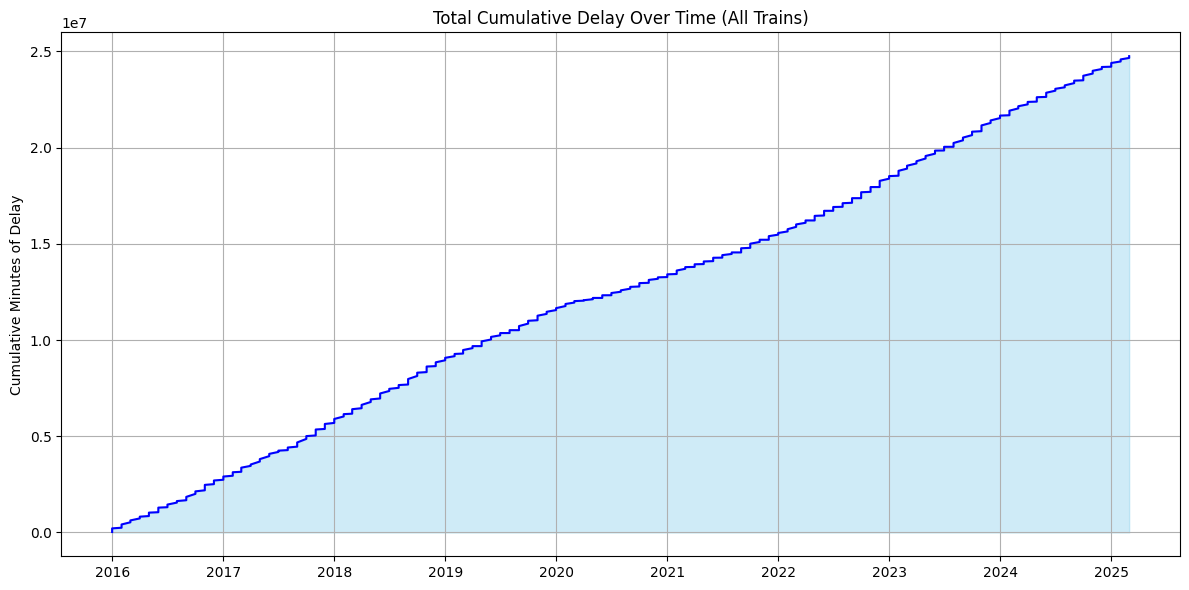

In [10]:
plt.figure(figsize=(12, 6))
plt.fill_between(df['Month'], df['Total cumulative delay'], color='skyblue', alpha=0.4)
plt.plot(df['Month'], df['Total cumulative delay'], color='blue')

plt.title('Total Cumulative Delay Over Time (All Trains)')
plt.ylabel('Cumulative Minutes of Delay')
plt.grid(True)
plt.tight_layout()
plt.show()

Hier is precies niet echt iets interessant aan te zien...

Verder in op ICT, omdat die wel iets speciaal toont

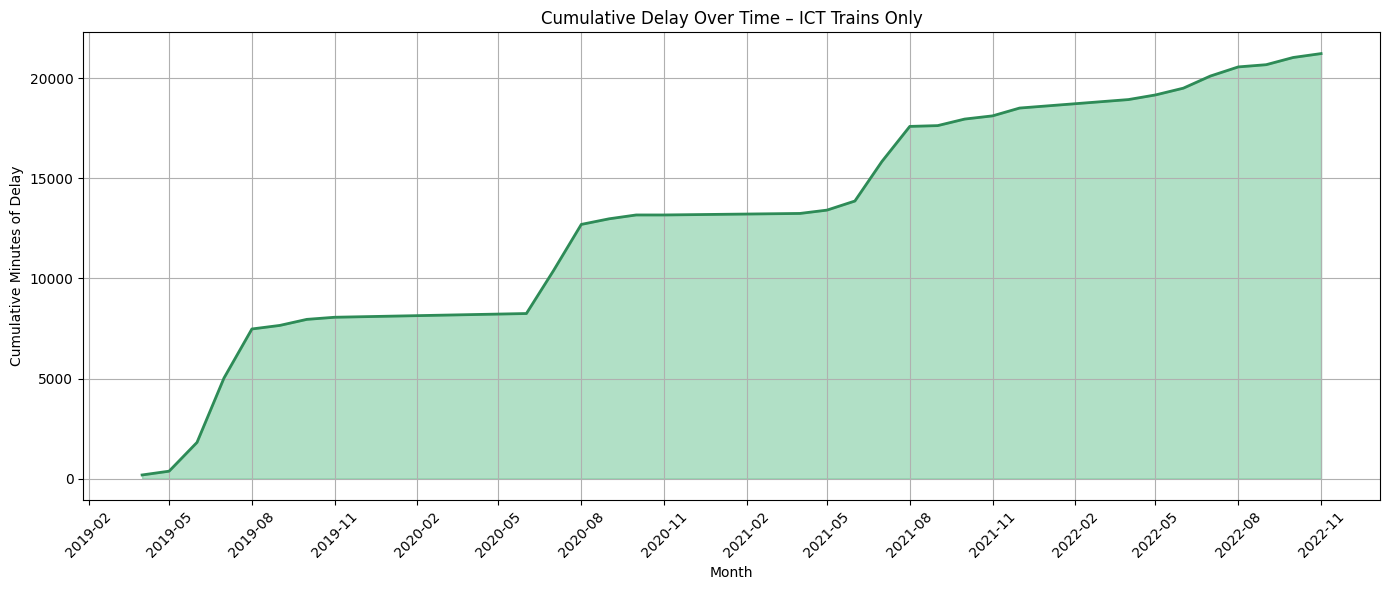

In [11]:
# Filter for ICT only
df_ict = df[df['Train type'] == 'ICT'].copy()

# Sort and calculate cumulative delay
df_ict = df_ict.sort_values('Month')
df_ict['Cumulative delay'] = df_ict['Minutes of delay'].cumsum()

plt.figure(figsize=(14, 6))
plt.fill_between(df_ict['Month'], df_ict['Cumulative delay'], color='mediumseagreen', alpha=0.4)
plt.plot(df_ict['Month'], df_ict['Cumulative delay'], color='seagreen', linewidth=2)

plt.title('Cumulative Delay Over Time – ICT Trains Only')
plt.ylabel('Cumulative Minutes of Delay')
plt.xlabel('Month')

# Set monthly ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


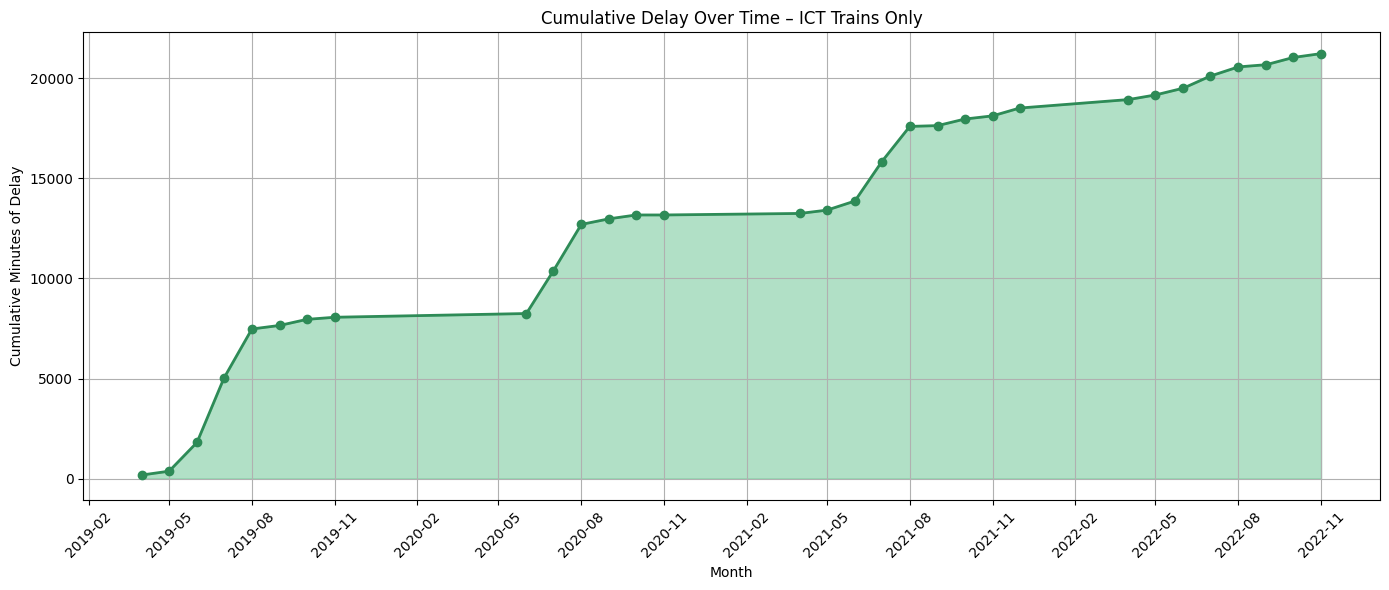

In [12]:
plt.figure(figsize=(14, 6))

# Fill under the line
plt.fill_between(df_ict['Month'], df_ict['Cumulative delay'], color='mediumseagreen', alpha=0.4)

# Line + Dots
plt.plot(df_ict['Month'], df_ict['Cumulative delay'], color='seagreen', linewidth=2, marker='o')

plt.title('Cumulative Delay Over Time – ICT Trains Only')
plt.ylabel('Cumulative Minutes of Delay')
plt.xlabel('Month')

# Set monthly ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # every 3 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Conclusie: hier is precies niet veel speciaals te zien, de vertragingspieken zijn te verklaren, omdat die ict niet elke maand reed

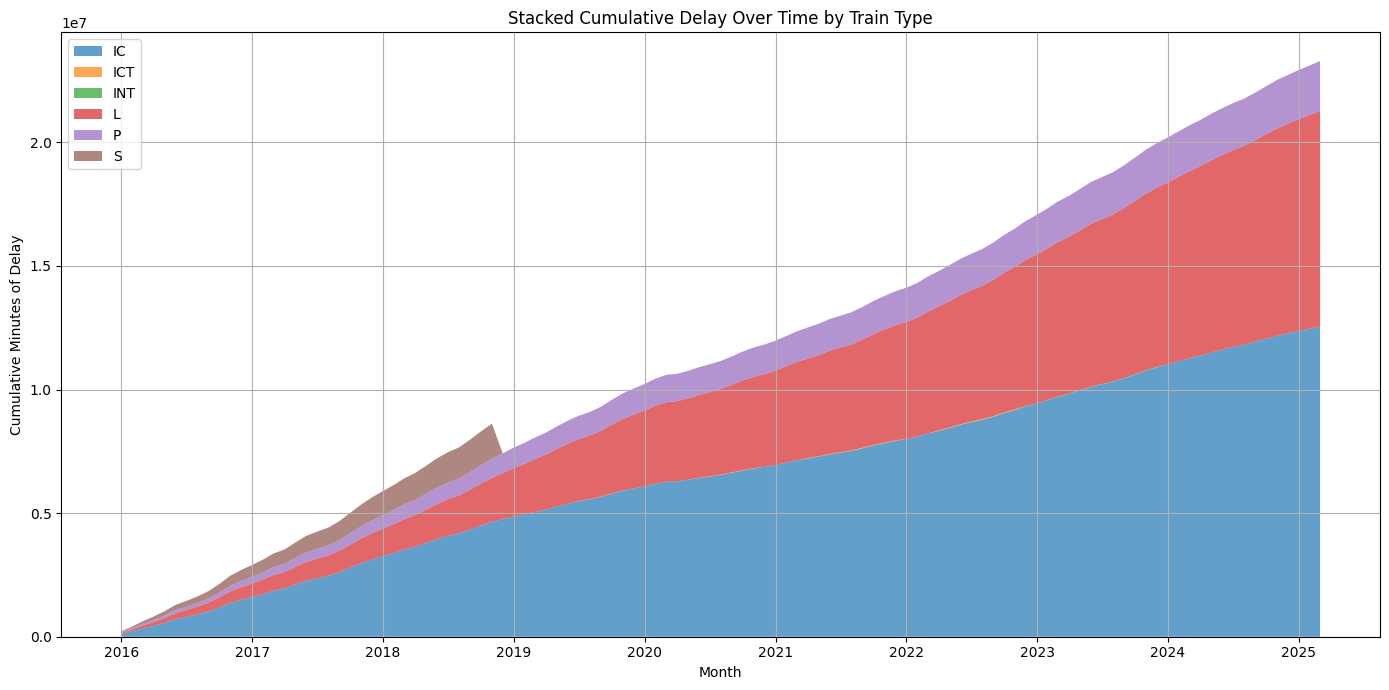

In [13]:
# Step 1: Prep cumulative delay per train type per month
df_sorted = df.sort_values('Month')
df_sorted['Cumulative delay'] = df_sorted.groupby('Train type')['Minutes of delay'].cumsum()

# Step 2: Pivot to wide format (each train type is a column)
cumulative_pivot = df_sorted.pivot(index='Month', columns='Train type', values='Cumulative delay').fillna(0)

# Step 3: Plot as stacked area chart
plt.figure(figsize=(14, 7))
plt.stackplot(cumulative_pivot.index, cumulative_pivot.T.values, labels=cumulative_pivot.columns, alpha=0.7)

plt.title('Stacked Cumulative Delay Over Time by Train Type')
plt.ylabel('Cumulative Minutes of Delay')
plt.xlabel('Month')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Dit toont dan wel weer welke type treinen meer vertraging hebben, maar niet elke type trein zichtbaar doordat deze niet lang bestonden en dan te weinig vertraging hebben om visueel te zien.

## Idee 4: 

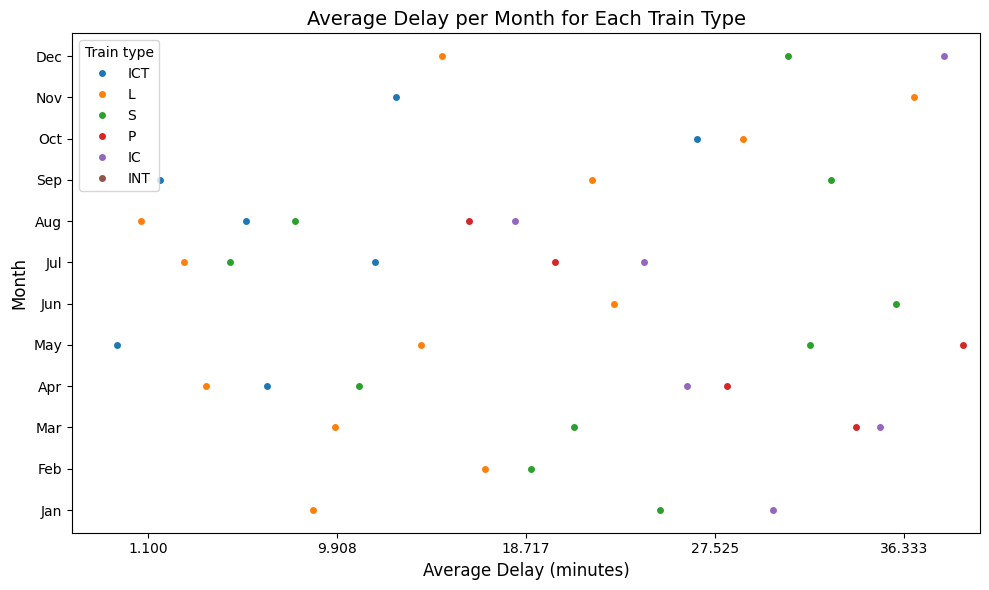

In [14]:
# Convert the 'Month' column to datetime
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# Extract just the month (1-12)
df['Month_num'] = df['Month'].dt.month

# Calculate the average delay per month for each train type
df['Average Delay'] = df['Minutes of delay'] / df['Number of operated trains']

# Group by 'Month_num' and 'Train type' and calculate the mean of 'Average Delay'
avg_delay_df = df.groupby(['Month_num', 'Train type'], as_index=False)['Average Delay'].mean()

# Create the dot plot with months on the y-axis and average delay on the x-axis
plt.figure(figsize=(10, 6))
sns.stripplot(data=avg_delay_df, x='Average Delay', y='Month_num', hue='Train type', jitter=True, dodge=True)

# Optional: Customize the plot
plt.title("Average Delay per Month for Each Train Type", fontsize=14)
plt.xlabel("Average Delay (minutes)", fontsize=12)
plt.ylabel("Month", fontsize=12)
plt.yticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Get the range of average delays
min_delay = avg_delay_df['Average Delay'].min()
max_delay = avg_delay_df['Average Delay'].max()

# Create 5 evenly spaced points on the x-axis
x_ticks = [min_delay + (max_delay - min_delay) * i / 4 for i in range(5)]

# Set the x-axis limits to span the entire range of delays, with a little padding
plt.xlim(min_delay - (max_delay - min_delay) * 0.1, max_delay + (max_delay - min_delay) * 0.1)

# Set the x-axis ticks to the evenly spaced values and round to 3 decimal places
plt.xticks(ticks=x_ticks, labels=[f"{x:.3f}" for x in x_ticks])

# Show the plot
plt.tight_layout()
plt.show()

Niet echt goed? Niet echt iets waard. Omdraaien assen gelijkend aan punctuality, voegt precies niet echt iets toe.

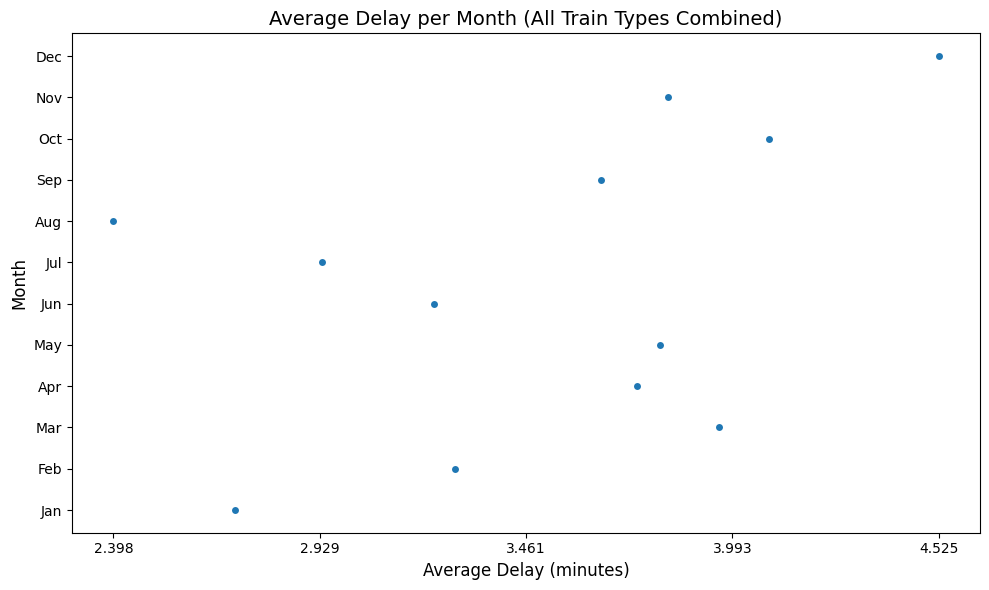

In [15]:
# Convert the 'Month' column to datetime
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# Extract just the month (1-12)
df['Month_num'] = df['Month'].dt.month

# Calculate the average delay per entry (i.e., for each train type and month)
df['Average Delay'] = df['Minutes of delay'] / df['Number of operated trains']

# Group by 'Month_num' and calculate the mean of 'Average Delay' across all train types for each month
avg_delay_df = df.groupby('Month_num', as_index=False)['Average Delay'].mean()

# Create the dot plot with months on the y-axis and average delay on the x-axis (only one point per month)
plt.figure(figsize=(10, 6))
sns.stripplot(data=avg_delay_df, x='Average Delay', y='Month_num', jitter = True, native_scale=True)

# Optional: Customize the plot
plt.title("Average Delay per Month (All Train Types Combined)", fontsize=14)
plt.xlabel("Average Delay (minutes)", fontsize=12)
plt.ylabel("Month", fontsize=12)
plt.yticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

# Get the range of average delays (make sure to use the correct data range)
min_delay = avg_delay_df['Average Delay'].min()
max_delay = avg_delay_df['Average Delay'].max()

# Calculate 3 evenly spaced values between the min and max delays (including the start and end)
x_ticks = np.linspace(min_delay, max_delay, 5)

# Set the x-axis limits based strictly on the data range plus a small padding
padding = (max_delay - min_delay) * 0.05  # 5% padding to avoid crowding
plt.xlim(min_delay - padding, max_delay + padding)

# Set the x-axis ticks to the 5 values (start, 3 in-between, end)
plt.xticks(ticks=x_ticks, labels=[f"{x:.3f}" for x in x_ticks])

# Show the plot
plt.tight_layout()
plt.show()

## Idee 5: (Robin)
## Idee 6: (Robin)
## Idee 7: NIET?

## Idee 8: boxplot distributie van de vertragingswaarden

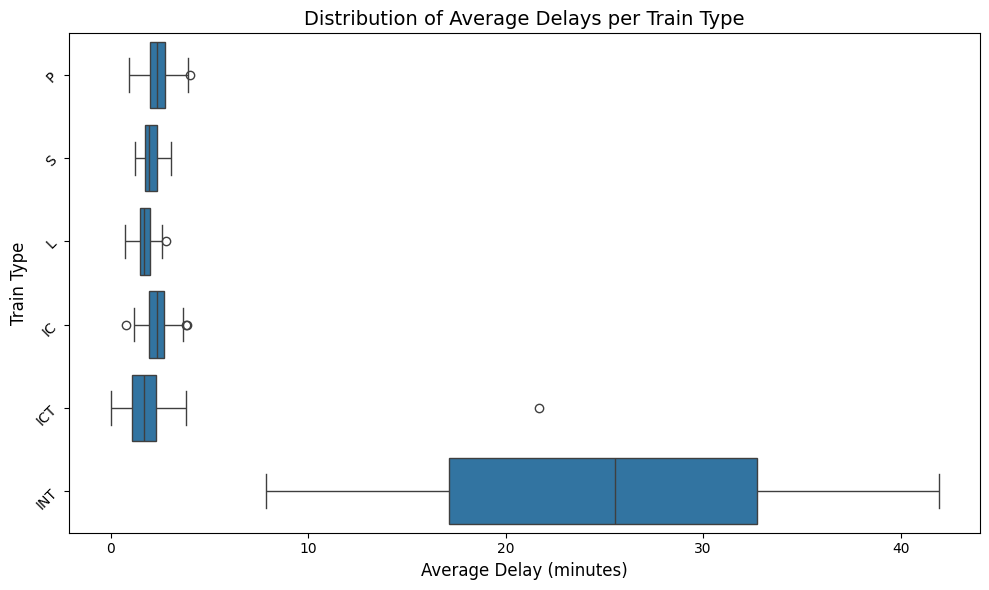

In [16]:
# Recalculate Average Delay per entry (if not already in your df)
df['Average Delay'] = df['Minutes of delay'] / df['Number of operated trains']

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Train type', x='Average Delay')

# Customize the plot
plt.title("Distribution of Average Delays per Train Type", fontsize=14)
plt.xlabel("Average Delay (minutes)", fontsize=12)
plt.ylabel("Train Type", fontsize=12)

# Optional: rotate x labels if they overlap
plt.yticks(rotation=45)

plt.tight_layout()
plt.show()

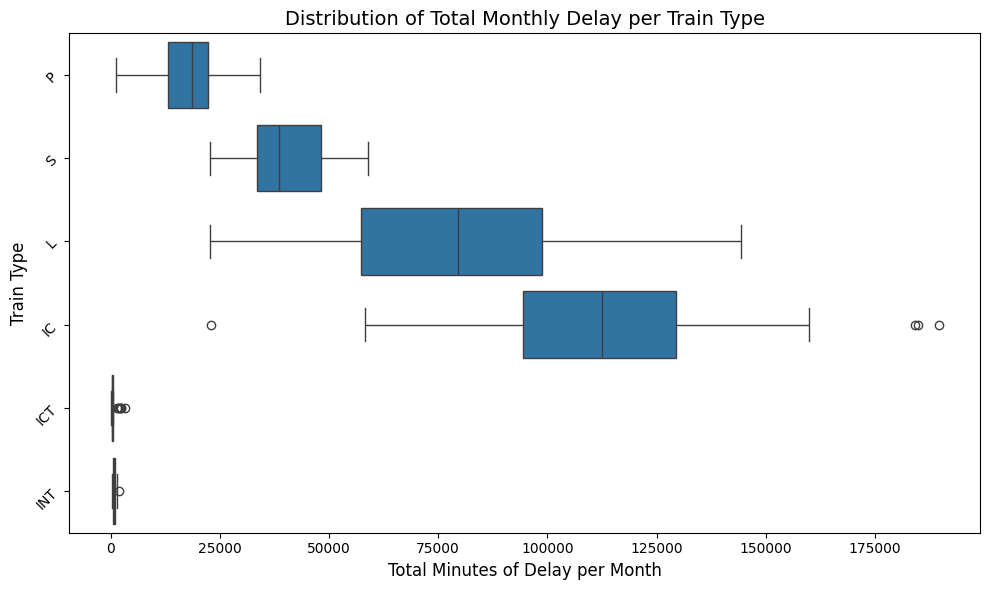

In [17]:
# Convert 'Month' to datetime for good measure
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# Keep only relevant columns
delay_by_type = df[['Train type', 'Minutes of delay']].copy()

# Create the boxplot: distribution of total monthly delay per train type
plt.figure(figsize=(10, 6))
sns.boxplot(data=delay_by_type, y='Train type', x='Minutes of delay')

# Customize
plt.title("Distribution of Total Monthly Delay per Train Type", fontsize=14)
plt.ylabel("Train Type", fontsize=12)
plt.xlabel("Total Minutes of Delay per Month", fontsize=12)
plt.yticks(rotation=45)

plt.tight_layout()
plt.show()

## Idee 9: tonen van hoeveel treinen per type

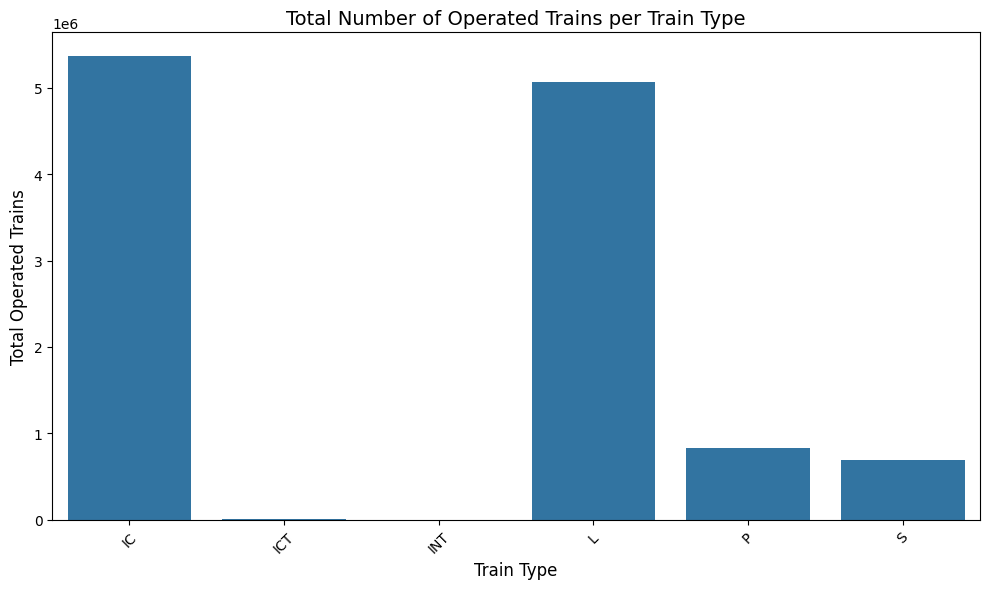

In [18]:
# Sum total number of operated trains per train type
trains_per_type = df.groupby('Train type', as_index=False)['Number of operated trains'].sum()

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=trains_per_type, x='Train type', y='Number of operated trains')

# Customize
plt.title("Total Number of Operated Trains per Train Type", fontsize=14)
plt.xlabel("Train Type", fontsize=12)
plt.ylabel("Total Operated Trains", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Idee 10: linechart voor tonen hoeveel treinen doorheen de jaren

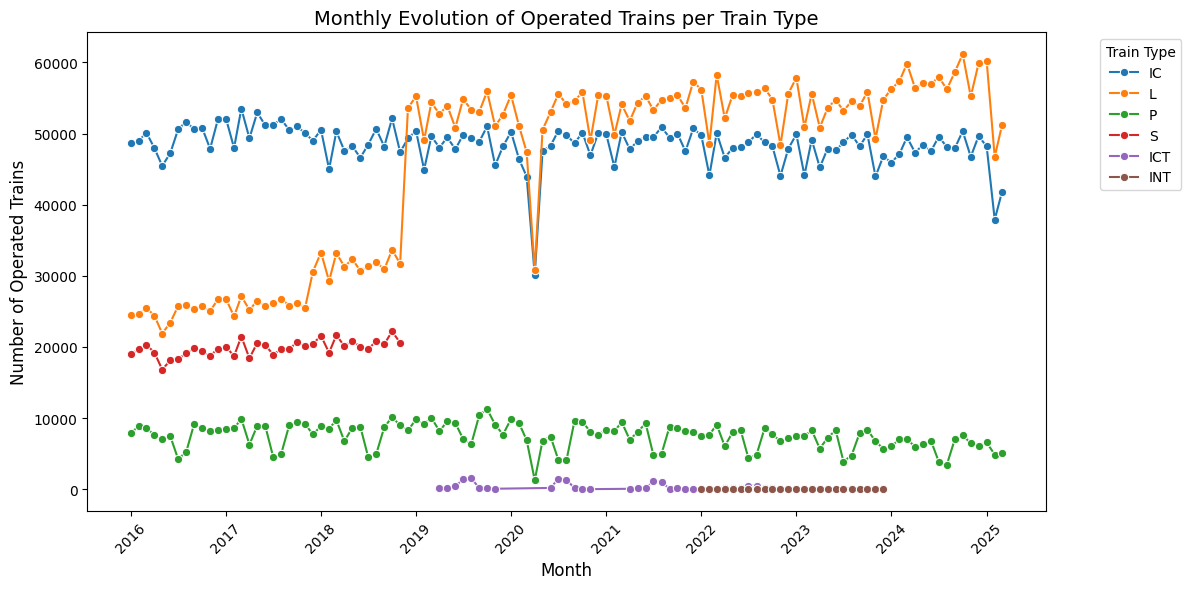

In [19]:
# Ensure 'Month' is in datetime format
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# Group by month and train type, summing the number of operated trains
monthly_trains = df.groupby(['Month', 'Train type'], as_index=False)['Number of operated trains'].sum()

# Set up the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trains, x='Month', y='Number of operated trains', hue='Train type', marker='o')

# Customize
plt.title("Monthly Evolution of Operated Trains per Train Type", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Operated Trains", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Train Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()